In [1]:
# Miscellaneous
import os
import glob
import time
from pathlib import Path
from natsort import natsorted

# Scientific
import numpy as np
import scipy
import librosa
from skimage.transform import resize
from beatbrain.metrics import ncc
from beatbrain import utils
import tensorflow as tf

# Visualization
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
from beatbrain.display import show_heatmap, show_spec

In [2]:
%matplotlib inline
sns.set()
sns.set_style("white")
plt.rcParams['figure.figsize'] = (10, 5)

In [8]:
DATA_ROOT = Path("../data/fma/image")
RECON_ROOT = Path("../logs")
image_pairs = [
    ("test/006/006329/0.exr", "cvae_2d_1sample_4/raw/reconstructed/recon_1@batch_4900.exr", "1 Sample"),
    ("test/006/006331/2.exr", "cvae_2d_20samples/raw/reconstructed/recon_1@batch_12900.exr", "20 Samples"),
    ("test/006/006331/3.exr", "cvae_2d_100samples_latent256/raw/reconstructed/recon_1@batch_37100.exr", "100 Samples"),
]

Spectrogram NCC: 0.9421577214214016
Spectrogram PSNR: -42.38322830200195
Spectrogram SSIM: 0.8522849082946777


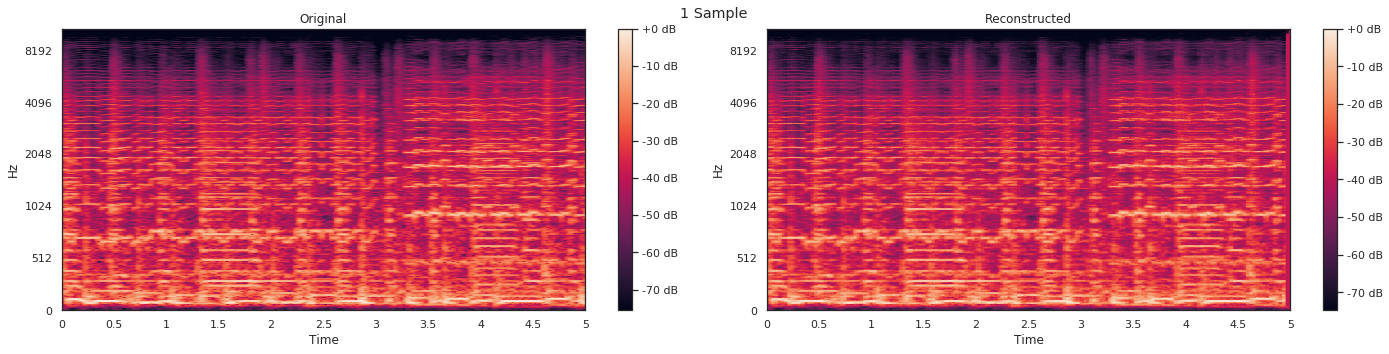

Spectrogram NCC: 0.7960886046641328
Spectrogram PSNR: -48.89719772338867
Spectrogram SSIM: 0.5450915098190308


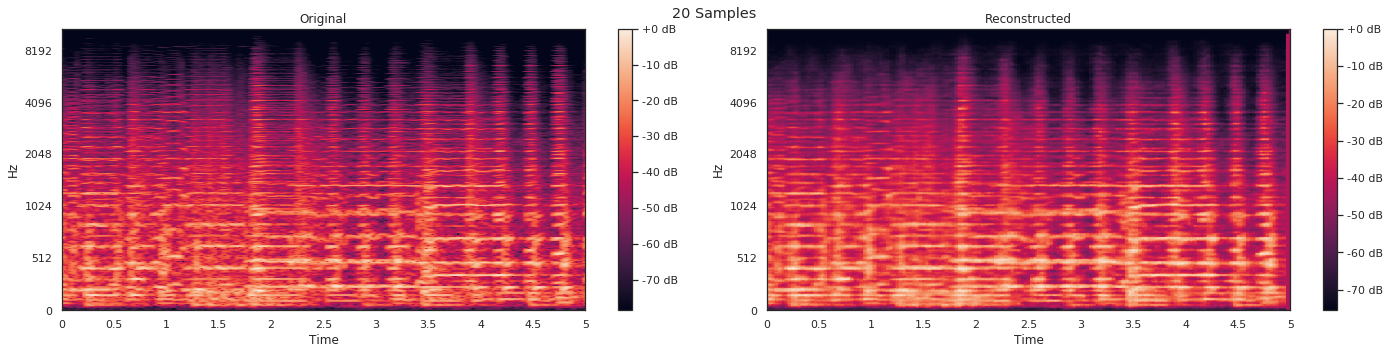

Spectrogram NCC: 0.6427001016147792
Spectrogram PSNR: -53.78561019897461
Spectrogram SSIM: 0.3517366647720337


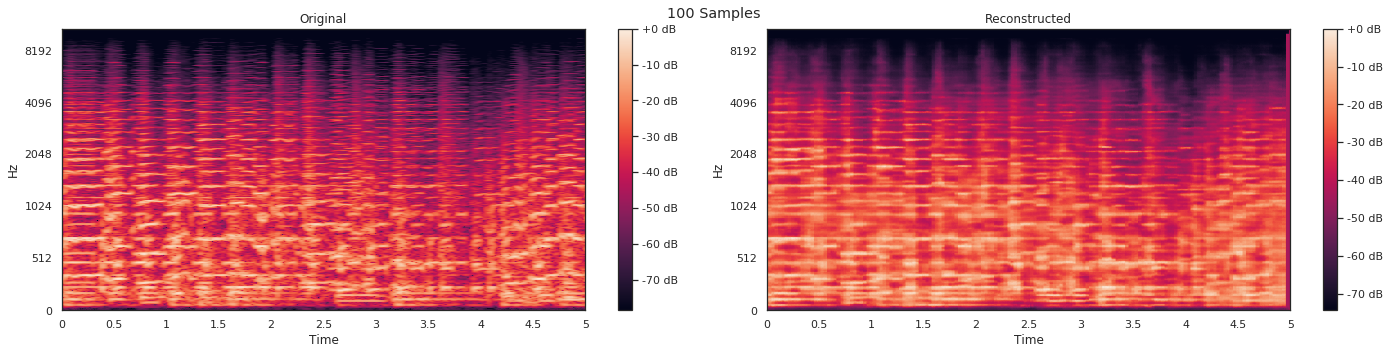

In [9]:
for spec_path, recon_path, title in image_pairs:
    spec = utils.denormalize_spectrogram(utils.load_image(DATA_ROOT / spec_path))
    recon_spec = utils.denormalize_spectrogram(utils.load_image(RECON_ROOT / recon_path))


    print(f"Spectrogram NCC: {ncc(spec, recon_spec)}")
    print(f"Spectrogram PSNR: {tf.image.psnr(spec[..., None], recon_spec[..., None], 1)}")
    print(f"Spectrogram SSIM: {tf.image.ssim(tf.convert_to_tensor(spec[..., None]), tf.convert_to_tensor(recon_spec)[..., None], 1)}")

#     print(f"Audio NCC: {ncc(audio, recon)}")
#     print(f"Audio PSNR: {tf.image.psnr(audio[None, ..., None], recon[None, ..., None], 1)}")

    fig = plt.figure(figsize=(20, 5))
    fig.suptitle(title)
    plt.subplot(121)
    show_spec(spec, title="Original", labels=True)
    plt.subplot(122)
    show_spec(recon_spec, title="Reconstructed", labels=True)
    plt.tight_layout()
    plt.show()